
# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 

<a id='intro'></a>

### Research Questions

> for this project I am going to explore the The Movie database and answer some qustions such as
    <ul>
    <li> What are the most popular movie genres?</li>
    <li> what are the top 10 highest revenue movies? </li>
    <li> what are the top 10 highest rated movies? </li>
    <li> who directed the most movies? </li>
    <li> Which year has the highest number of movie released? </li>
    <li> Which movie casts starred in movies that has profited more than average? </li>
    <li> Which movie is the most popular? </li>
    <li> Correlations? </li>
</ul>

In [239]:
# set up import statements for all of the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [240]:
# Load the data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [241]:
# View of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [242]:
df.shape

(10866, 21)


### Data Cleaning

 

In [243]:

# drop unused columns 
df.drop(labels = ['imdb_id' , 'homepage' , 'budget_adj' , 'revenue_adj'] , axis = 1 , inplace = True)

df.shape

(10866, 17)

In [244]:
# drop rows with null values 

df.dropna(inplace = True)

#check 
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [245]:
#check fo duplicates 
print(df.duplicated().sum())
print(df.shape)

1
(7032, 17)


In [246]:
# removing duplicates

df.drop_duplicates(inplace = True)

df.shape

(7031, 17)

In [247]:
# check for 0 vlaues 

(df[['runtime','budget','revenue']] == 0 ).sum()

runtime       3
budget     2766
revenue    2855
dtype: int64

In [248]:
# remove rows with 0 values
df = df.loc[(df[['runtime','budget','revenue']] != 0).all(axis=1)]

df.shape

(3445, 17)

In [249]:
# fixing data types

df['release_date'] = pd.to_datetime(df['release_date'])

df.dtypes

id                               int64
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

In [250]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What are the most popular movie genres ?)

In [251]:
#create a function that splits a column by '|'
def split(data, column):
    #this splits column with '|'
    split = data[column].str.split('|') 
    
    split = split.explode()
    
    return split.value_counts()

In [252]:
# use the function split to split the column
genres = split(df, 'genres')
genres

Drama              1515
Comedy             1199
Thriller           1112
Action             1013
Adventure           698
Crime               593
Romance             566
Science Fiction     497
Horror              436
Family              387
Fantasy             371
Mystery             323
Animation           185
History             112
Music               109
War                 107
Western              48
Documentary          23
Foreign               6
TV Movie              1
Name: genres, dtype: int64

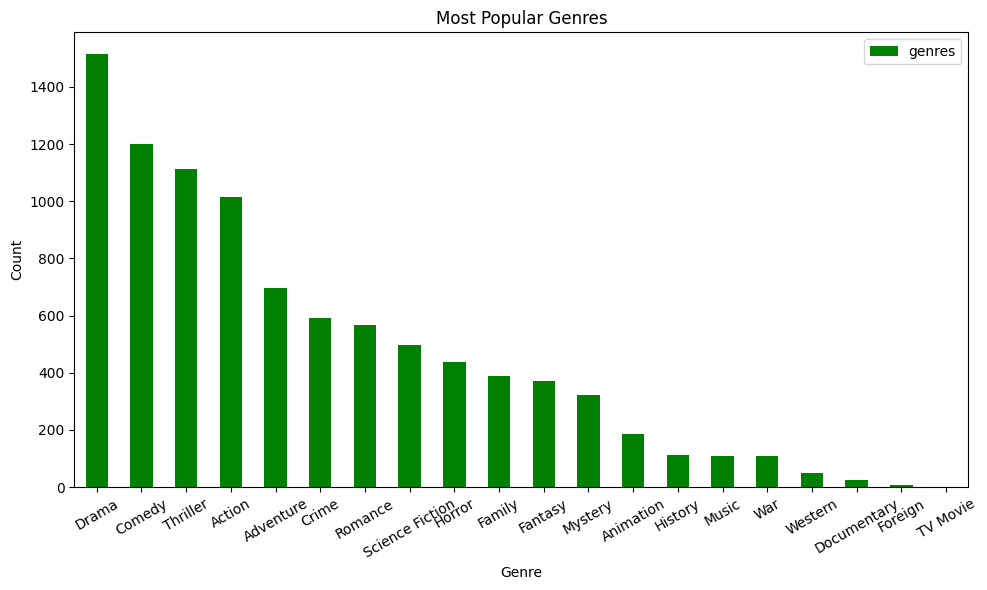

In [253]:
# plotting 

plt.figure(figsize=(10, 6))
genres.plot(kind='bar', color='green')
plt.title('Most Popular Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=30)

plt.legend()
plt.tight_layout()
plt.show()


 As we can see in the bar chart, the top 3 most popular genres are 1-Drama, 2-Comedy, 3-Thriller.
 

### Research Question 2  (what are the top 10 highest revenue movies?)

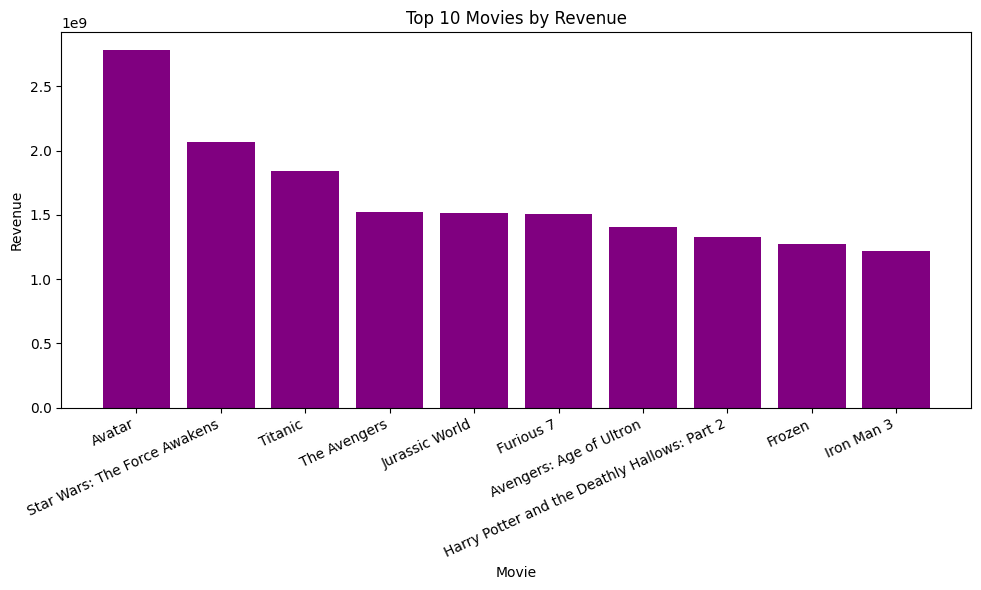

In [254]:

# sorting by revenue
df_sorted = df.sort_values(by='revenue', ascending=False)
top_10_revenue = df_sorted.head(10)

# plotting

plt.figure(figsize=(10, 6))
plt.bar(top_10_revenue['original_title'], top_10_revenue['revenue'], color='purple')
plt.xlabel('Movie')
plt.ylabel('Revenue')
plt.title('Top 10 Movies by Revenue')
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()


 As we can see in the bar chart, the movie with the highest revenue is Avatar
 

### Research Question 3  (what are the top 10 highest rated movies?)

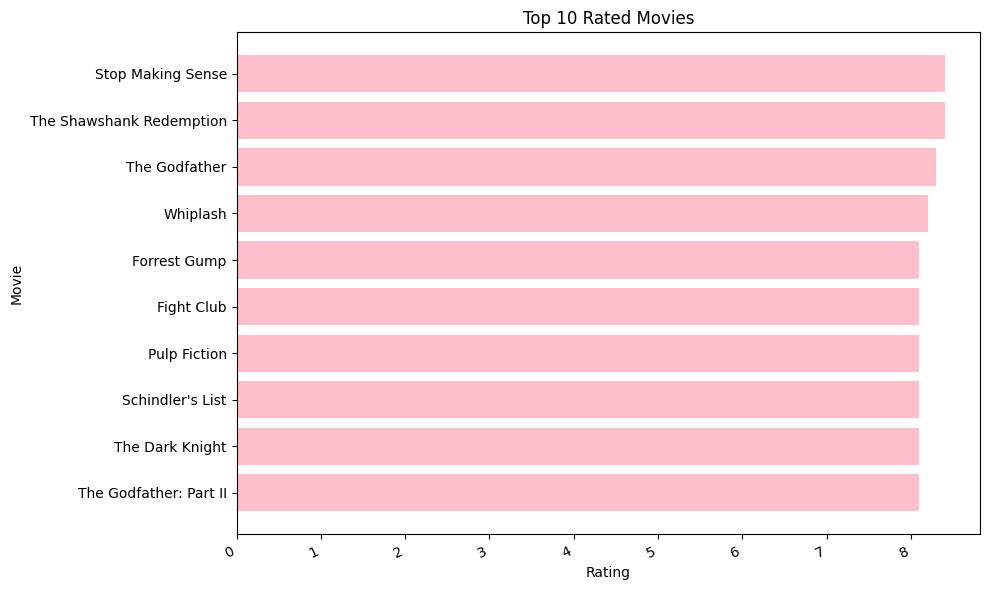

In [255]:
# sorting by vote_average
df_sorted = df.sort_values(by='vote_average', ascending=True)
top_10_revenue = df_sorted.tail(10)

# plotting

plt.figure(figsize=(10, 6))
plt.barh(top_10_revenue['original_title'], top_10_revenue['vote_average'], color='pink')
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.title('Top 10 Rated Movies')
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()


 As we can see in the horizontal bar chart, the highest rated movie is 'Stop Making Sense'
 

### Research Question 4  (who directed the most movies?)

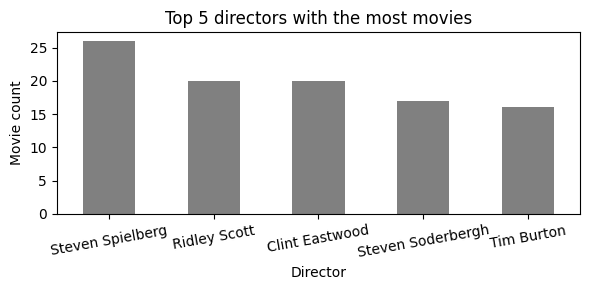

In [256]:
# plotting

plt.figure(figsize=(6, 3))
df['director'].value_counts().head(5).plot(kind='bar', color='grey')
plt.title('Top 5 directors with the most movies')
plt.xlabel('Director')
plt.ylabel('Movie count')
plt.xticks(rotation=10)

plt.tight_layout()
plt.show()

##### As we can see in the bar chart, the top 5 directors with the most movies are:
1- steven Spielberg 
2- Ridley Scott 
3- Clint Eastwood
4- Steven Soderbergh 
5- Tim Burton
 

### Research Question 5  (Which year has the highest number of movie released ??)

In [257]:
# grouping by year
movie_year = df.groupby('release_year').size()
movie_year.head()

release_year
1960    4
1961    9
1962    7
1963    6
1964    7
dtype: int64

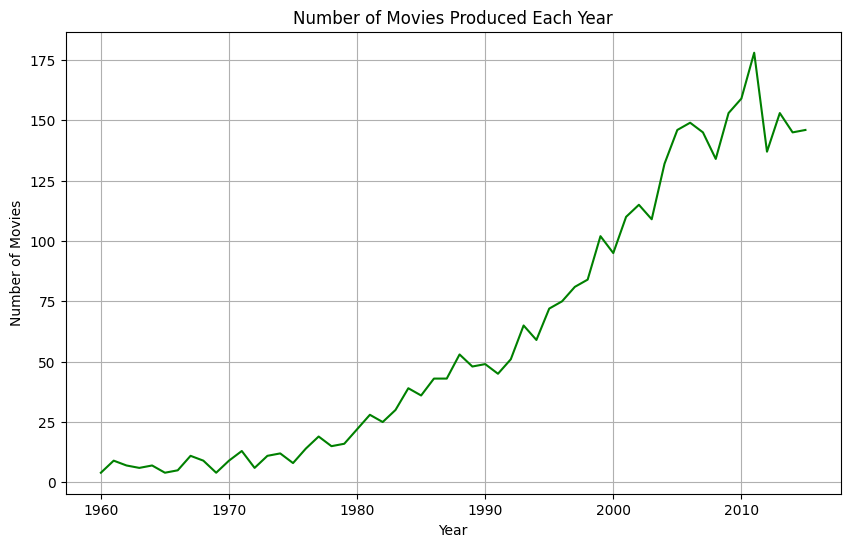

In [258]:
# create a line chart

plt.figure(figsize=(10, 6))
plt.plot(movie_year.index, movie_year.values, color = 'green', linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Produced Each Year')

# Show the plot
plt.grid(True)
plt.show()

as show in the line chart , as the years progress, there is a corresponding increase in the number of movies produced, and the year with the highest movies produced is 2011

# Research Question 6  (Which movie casts starred in movies that has profited more than average ??)

In [259]:
# adding a profit column
df['profit'] = df['revenue'] - df['budget']

# find the average of profit 

profit_avg = np.mean(df['profit'])
profit_avg

77285382.36487663

In [260]:
# filtering above average
above_avg = df[df['profit'] > profit_avg]
above_avg.head(2)

,id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,228436354


In [261]:
# splitting the column cast using the function split

above_avg = split(above_avg, 'cast')

above_avg

Tom Cruise            26
Tom Hanks             20
Brad Pitt             19
Sylvester Stallone    19
Cameron Diaz          18
                      ..
Joaquim de Almeida     1
Alexis Cruz            1
Viveca Lindfors        1
Jaye Davidson          1
Tom Hulce              1
Name: cast, Length: 2333, dtype: int64

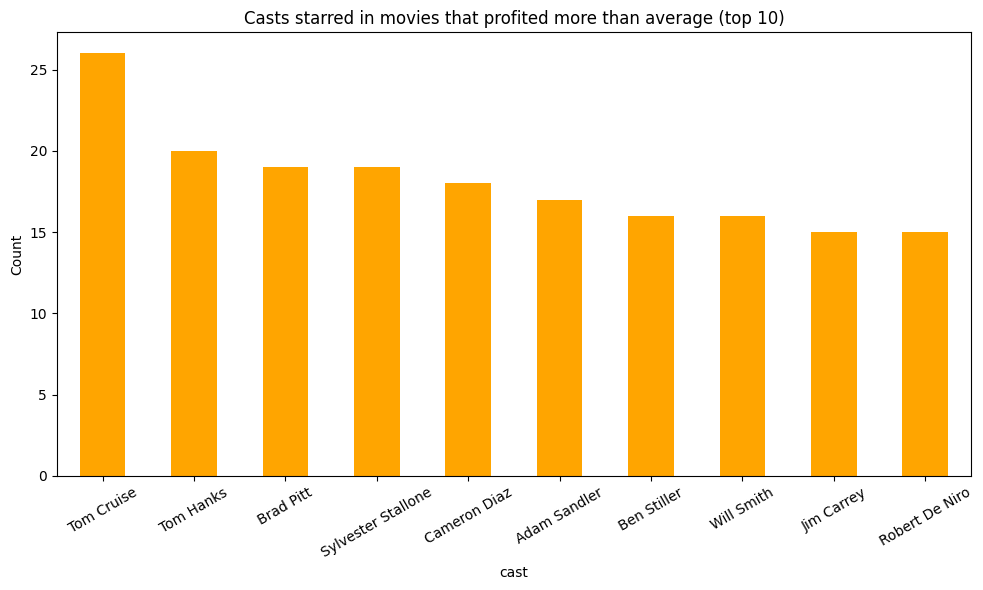

In [262]:
# plotting 

plt.figure(figsize=(10, 6))
above_avg.head(10).plot(kind='bar', color='orange')
plt.title('Casts starred in movies that profited more than average (top 10)')
plt.xlabel('cast')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Tom Cruise has The most movies that profited more than average
 

# Research Question 7  (Which movie is the most popular??)

In [263]:
df.iloc[df['popularity'].idxmax()]

id                                                                 135397
popularity                                                      32.985763
budget                                                          150000000
revenue                                                        1513528810
original_title                                             Jurassic World
cast                    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
director                                                  Colin Trevorrow
tagline                                                 The park is open.
keywords                monster|dna|tyrannosaurus rex|velociraptor|island
overview                Twenty-two years after the events of Jurassic ...
runtime                                                               124
genres                          Action|Adventure|Science Fiction|Thriller
production_companies    Universal Studios|Amblin Entertainment|Legenda...
release_date                          

#### The movie **Jurassic World** is the most popular movie

# Correlation

### 1- correlation between revenue and vote average 

In [264]:
# to find the correlation value

df['revenue'].corr(df['vote_average'])

0.2371673121260242

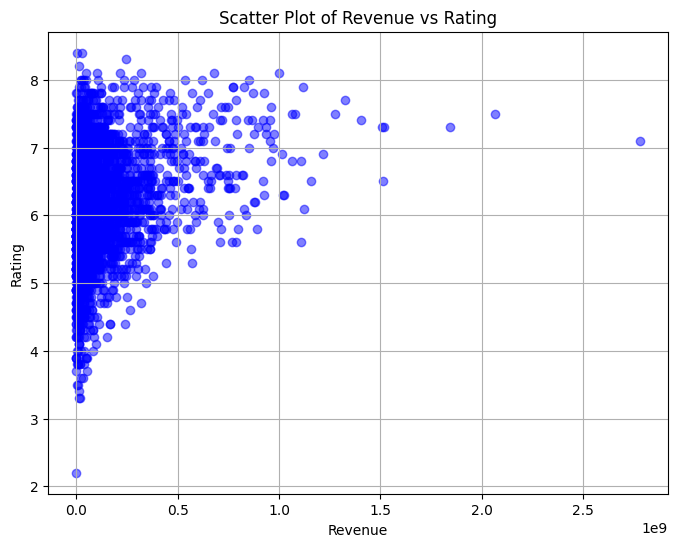

In [265]:
# creating a scatter chart 

plt.figure(figsize=(8, 6))
plt.scatter(df['revenue'], df['vote_average'], color='blue', alpha=0.5)
plt.xlabel('Revenue')
plt.ylabel('Rating')
plt.title('Scatter Plot of Revenue vs Rating')
plt.grid(True)
plt.show()

As shown in the scatter chart and the correlation value there is a weak positive correlation between revenue and vote average

### 2-correlation between popularity and run time

In [266]:
df['popularity'].corr(df['runtime'])

0.22591183888860525

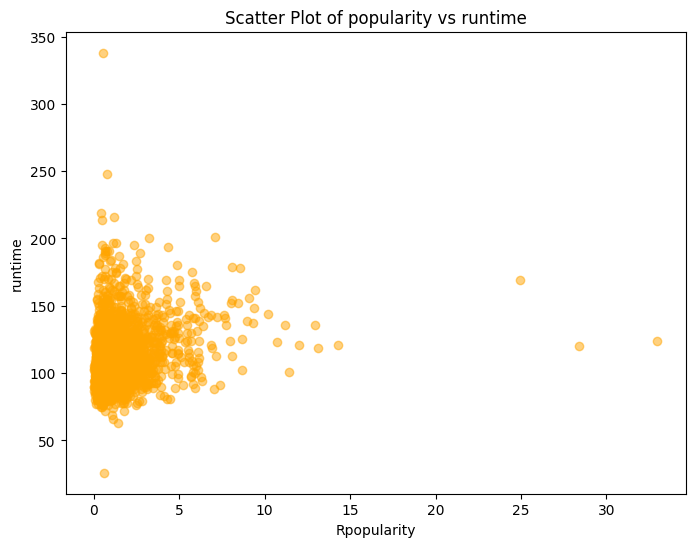

In [267]:
# creating a scatter chart 

plt.figure(figsize=(8, 6))
plt.scatter(df['popularity'], df['runtime'], color='orange', alpha=0.5)
plt.xlabel('Rpopularity')
plt.ylabel('runtime')
plt.title('Scatter Plot of popularity vs runtime')
plt.grid(False)
plt.show()

As shown in the scatter chart and the correlation value there is a weak positive correlation between popularity and vote average

### 3- Correlation between profit and revenue

In [268]:

# finding the correlation value
df['revenue'].corr(df['profit'])

0.979474177175267

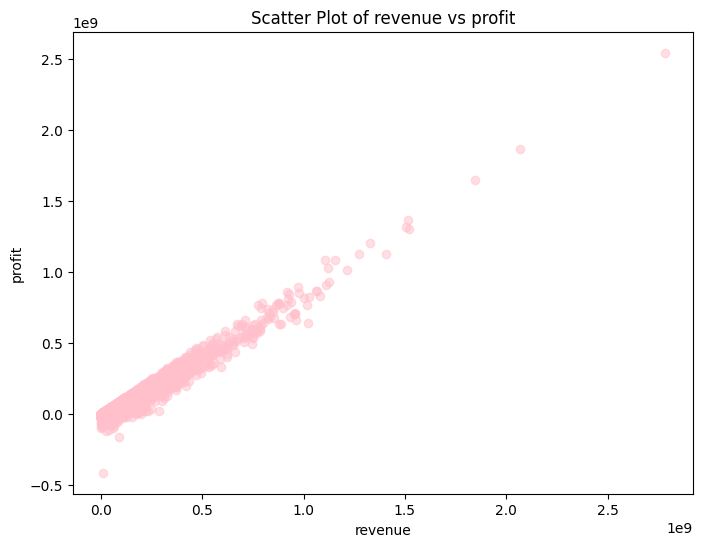

In [269]:
# creating a scatter chart

plt.figure(figsize=(8, 6))
plt.scatter(df['revenue'], df['profit'], color='pink', alpha=0.5)
plt.xlabel('revenue')
plt.ylabel('profit')
plt.title('Scatter Plot of revenue vs profit')
plt.grid(False)
plt.show()

As shown in the scatter chart and the correlation value there is a strong positive correlation between revenue and profit

<a id='conclusions'></a>
## Conclusions

<ul>
<li> 1-	the top 3 most popular genres are 1-Drama, 2-Comedy, 3-Thriller. </li>
 
<li>2-	the movie with the highest revenue is Avatar </li>
<li>3-	the highest rated movie is Stop Making Sense </li>
<li> 4-	the top 5 directors with the most movies are:
•	1- Steven Spielberg 
•	2- Ridley Scott 
•	3- Clint Eastwood
•	4- Steven Soderbergh 
•	5- Tim Burton </li>
    
<li> 5-	as the years progress, there is a corresponding increase in the number of movies produced, and the year with the highest movies produced is 2011 </li>
<li> 6-	Tom Cruise has the most movies that profited more than average </li>
<li> 7-	The movie Jurassic World is the most popular movie </li>
<li> 8-	there is a weak positive correlation between revenue and vote average </li>
<li> 9-	weak positive correlation between popularity and vote average </li>
<li> 10-	there is a strong positive correlation between revenue and profit </li>

### Limitaions
>One of the limitaions I faced during the analysis proccess is that there are too many missing values so I had to drop too many rows.

> adding a column that shows the number of people who voted will be usefull to know the accuracy of vote_average.

In [270]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 9 image(s).
[NbConvertApp] Writing 838156 bytes to Investigate_a_Dataset.html
